In [2]:
import numpy as np

X_train = np.load('X_train_embeddings.npy')
y_train = np.load('y_train.npy')
X_test = np.load('X_test_embeddings.npy')
y_test = np.load('y_test.npy')

print('X train shape :',X_train.shape)
print('y train shape :',y_train.shape)
print('X test shape :',X_test.shape)
print('y test shape :',y_test.shape)

# Fusionner les données d'entraînement et de test
X_combined = np.concatenate((X_train, X_test), axis=0)
y_combined = np.concatenate((y_train, y_test), axis=0)

# Afficher les formes des matrices fusionnées
print('Shape de X combiné :', X_combined.shape)
print('Shape de y combiné :', y_combined.shape)


X train shape : (15761, 768)
y train shape : (15761, 22)
X test shape : (3960, 768)
y test shape : (3960, 22)
Shape de X combiné : (19721, 768)
Shape de y combiné : (19721, 22)


# Fonction de visualisation

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def class_frequence(y, title):
    # Calcul des fréquences en sommant les colonnes
    class_frequencies = np.sum(y, axis=0)
    print(class_frequencies)

    num_classes = y.shape[1]

    # Calcul des proportions
    total_samples = len(y)
    class_proportions = class_frequencies / total_samples

    class_names = [f"Classe {i}" for i in range(num_classes)]

    # Créer le graphique
    plt.figure(figsize=(10, 6))
    bars = plt.bar(class_names, class_frequencies, color='skyblue')
    plt.xlabel("Classes")
    plt.ylabel("Fréquences")
    plt.title(title)
    plt.xticks(rotation=45, ha='right')

    # Ajouter la proportion au-dessus de chaque barre
    for bar, proportion in zip(bars, class_proportions):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
                 f'{proportion:.2f}', ha='center', va='bottom', fontsize=10)

    plt.tight_layout()
    plt.show()

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def plot_class_occurrences(y_train):
    """
    Affiche la fréquence de présence des classes seules, à deux, à trois, etc.

    :param y_train: numpy array ou DataFrame (one-hot encoded)
    """
    # Compte le nombre de classes actives pour chaque échantillon
    class_counts = np.sum(y_train, axis=1)  # Nombre de classes actives pour chaque échantillon

    # Compte combien de fois il y a 1, 2, 3,... classes actives
    count_distribution = np.bincount(class_counts)  # Compte la fréquence des occurrences de chaque nombre d'activations

    # Création du graphique
    plt.figure(figsize=(10, 6))
    plt.bar(np.arange(len(count_distribution)), count_distribution, color='skyblue')

    # Configuration du graphique
    plt.xlabel("Nombre de classes actives")
    plt.ylabel("Fréquence d'occurrence")
    plt.title("Fréquence de présence des classes dans y_train (seules, en paire, etc.)")
    plt.xticks(np.arange(len(count_distribution)))
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Affichage
    plt.show()

    # Affichage des informations
    for i, count in enumerate(count_distribution):
        if count > 0:
            print(f"{i} classes actives : {count} échantillons")


In [5]:
import numpy as np
import matplotlib.pyplot as plt

def plot_class_individual_occurrences(y_train):
    """
    Affiche combien de fois chaque classe est présente seule ou avec d'autres classes.

    :param y_train: numpy array ou DataFrame (one-hot encoded)
    """
    num_samples, num_classes = y_train.shape
    solo_counts = np.zeros(num_classes)  # Compte combien de fois chaque classe est seule
    co_occurrence_counts = np.zeros(num_classes)  # Compte combien de fois chaque classe coexiste avec d'autres

    # Parcours chaque échantillon
    for i in range(num_samples):
        active_classes = np.where(y_train[i] == 1)[0]  # Classes activées pour cet échantillon
        for cls in active_classes:
            if len(active_classes) == 1:
                solo_counts[cls] += 1  # Classe seule
            else:
                co_occurrence_counts[cls] += 1  # Classe avec d'autres

    # Création du graphique
    plt.figure(figsize=(12, 6))
    width = 0.35  # largeur des barres
    x = np.arange(num_classes)  # positions des barres

    plt.bar(x - width/2, solo_counts, width, label='Classe seule', color='blue')
    plt.bar(x + width/2, co_occurrence_counts, width, label='Classe avec d\'autres', color='red')

    # Configuration du graphique
    plt.xlabel("Classes")
    plt.ylabel("Fréquence d'occurrence")
    plt.title("Analyse des classes : seule vs avec d'autres classes")
    plt.xticks(x, [f"Classe {i}" for i in range(num_classes)], rotation=90)
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Affichage
    plt.show()

    # Affichage des informations détaillées
    for i in range(num_classes):
        print(f"Classe {i} :")
        print(f"  - Présente seule : {solo_counts[i]} fois")
        print(f"  - Présente avec d'autres classes : {co_occurrence_counts[i]} fois")
        print("-" * 50)


# Undersampling

[ 1421 10207   370   433  2746  5511  1567  1936   359  1072   305  3003
  2004  1007   273   864   356  1069  6556   680   307   506]


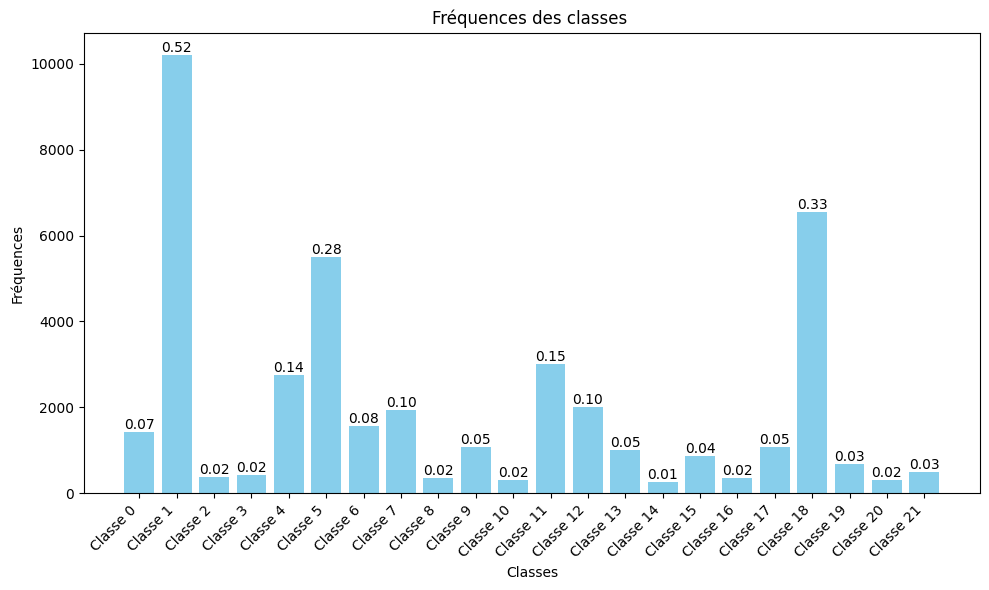

In [6]:
class_frequence(y_combined, 'Fréquences des classes ')

X train shape : (2744, 768)
y train shape : (2744, 22)
[  19 1291  370  433  340  518  151  135  359  580  305  123  364   44
  273  154  356  211  591   65  307  506]


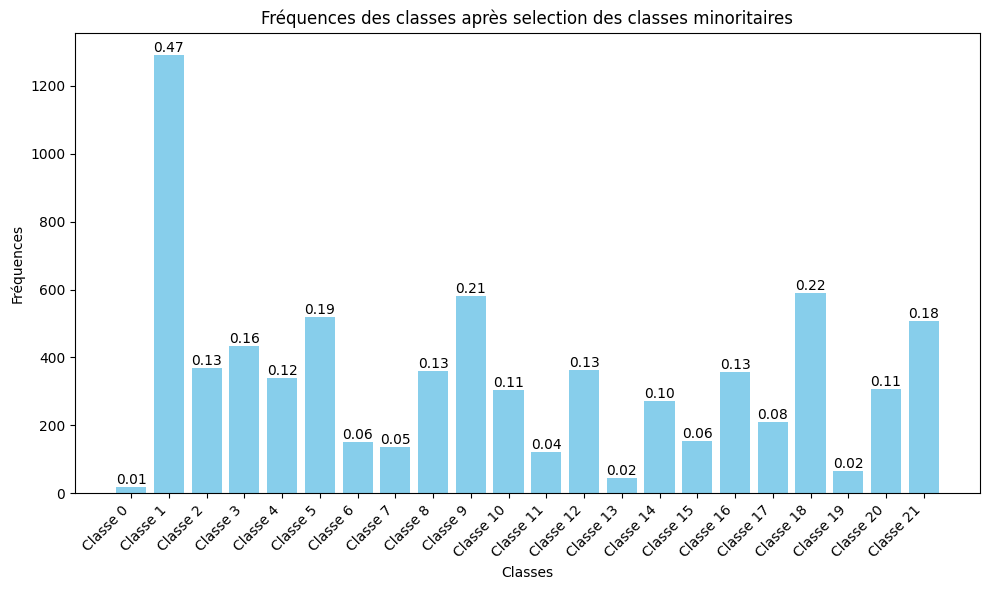

Nombre d’exemples avec classes minoritaires : 2744
Nombre d’exemples du reste après séparation : 16977
Nombre d’exemples avec classes majoritaires : 16521
Nombre d’exemples restants après suppression des eg avec au moins une presence d'une classe maj : 456
X train shape : (3200, 768)
y train shape : (3200, 22)
[  65 1291  370  433  340  518  151  135  359  643  305  123  364   92
  273  217  356  402  591  135  307  506]


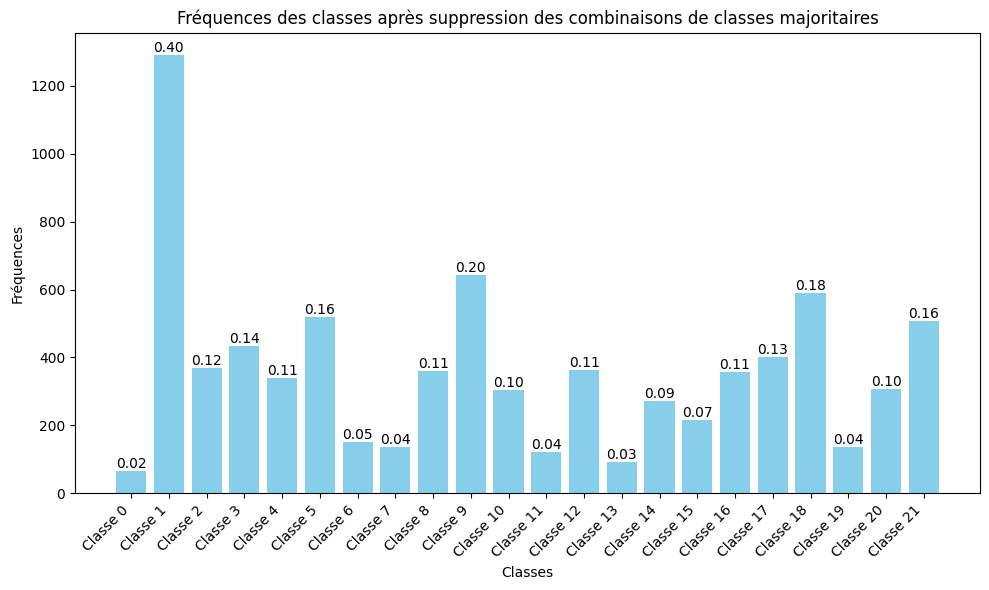

In [7]:
classes_min = [2, 3 , 8, 10, 14, 16, 20, 21]
classes_maj = [1, 5, 4, 6, 7, 11, 12, 18]
the_rest = [0, 9, 13, 15, 17, 19]

def undersample_classes(X, y, classes_min, classes_maj):
    X_resampled = []
    y_resampled = []
    X_supp = []
    y_supp = []
    indices_classes_min = set()
    indices_resample = []
    indices_supprimer = []

    # Conserver les exemples avec les classes minoritaires
    for i in range(len(y)):
        if any(y[i][label] == 1 for label in classes_min):
            indices_classes_min.add(i)
            X_resampled.append(X[i])
            y_resampled.append(y[i])

    print('X train shape :',np.array(X_resampled).shape)
    print('y train shape :',np.array(y_resampled).shape)
    class_frequence(np.array(y_resampled), 'Fréquences des classes après selection des classes minoritaires')


    # Enregistrer les indices restants (non minoritaires)
    indices_resample = [i for i in range(len(y)) if i not in indices_classes_min]

    print('Nombre d’exemples avec classes minoritaires :', len(indices_classes_min))
    print('Nombre d’exemples du reste après séparation :', len(indices_resample))

    # Supprimer les exemples avec des classes majoritaires
    for i in indices_resample:
        if any(y[i][label] == 1 for label in classes_maj):
            indices_supprimer.append(i)

    # Retirer les indices des classes majoritaires de la liste des indices restants
    indices_resample = [i for i in indices_resample if i not in indices_supprimer]

    print('Nombre d’exemples avec classes majoritaires :', len(indices_supprimer))
    print('Nombre d’exemples restants après suppression des eg avec au moins une presence d\'une classe maj :', len(indices_resample))

    for i in indices_resample:
        X_resampled.append(X[i])
        y_resampled.append(y[i])

    print('X train shape :',np.array(X_resampled).shape)
    print('y train shape :',np.array(y_resampled).shape)

    class_frequence(np.array(y_resampled), 'Fréquences des classes après suppression des combinaisons de classes majoritaires')

    return np.array(X_resampled), np.array(y_resampled)


x_resampled, y_resampled = undersample_classes(X_combined, y_combined, classes_min, classes_maj)


[  65 1291  370  433  340  518  151  135  359  643  305  123  364   92
  273  217  356  402  591  135  307  506]


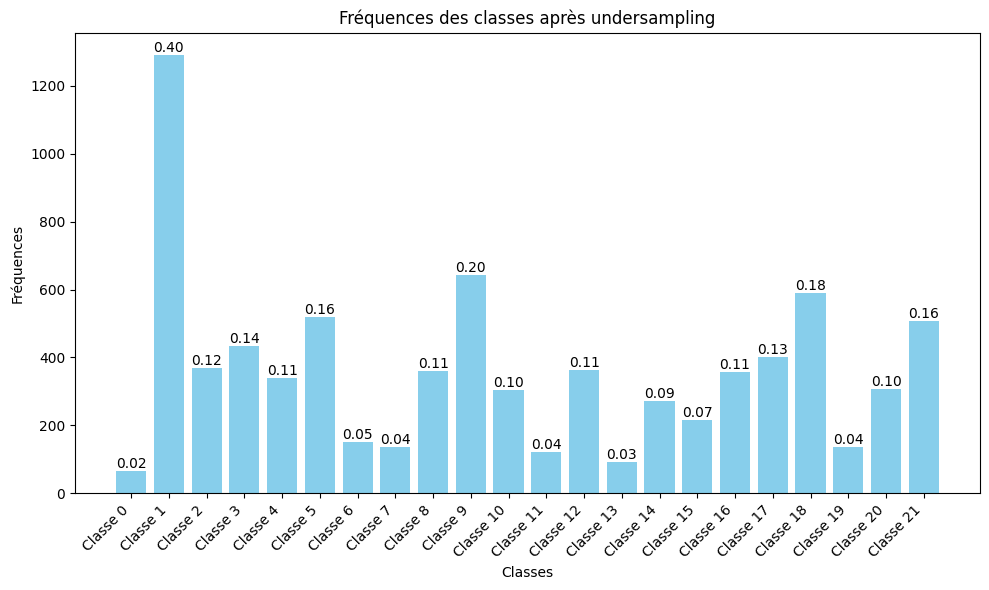

In [8]:
class_frequence(y_resampled, "Fréquences des classes après undersampling")


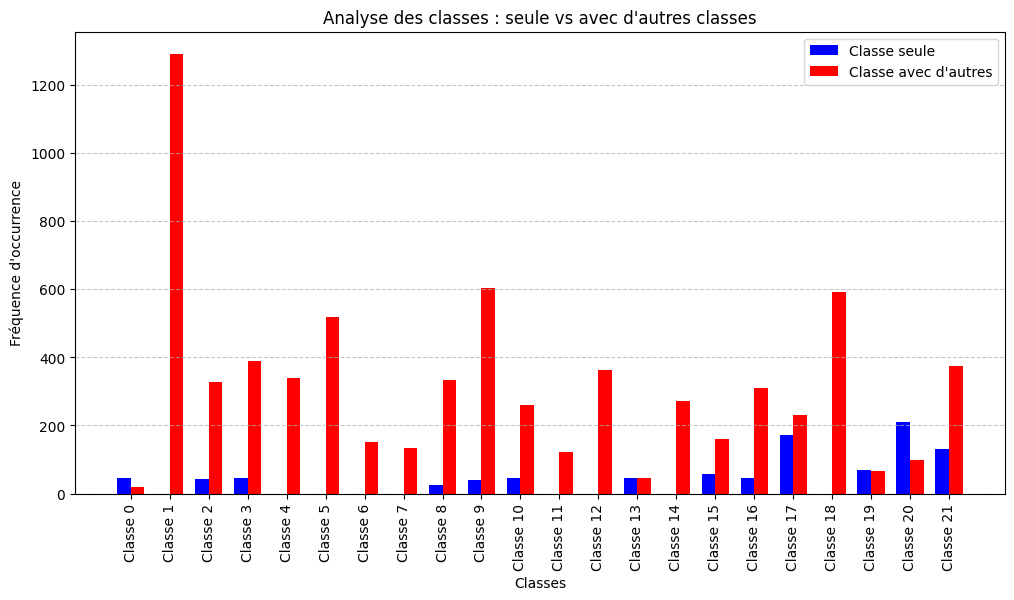

Classe 0 :
  - Présente seule : 46.0 fois
  - Présente avec d'autres classes : 19.0 fois
--------------------------------------------------
Classe 1 :
  - Présente seule : 0.0 fois
  - Présente avec d'autres classes : 1291.0 fois
--------------------------------------------------
Classe 2 :
  - Présente seule : 44.0 fois
  - Présente avec d'autres classes : 326.0 fois
--------------------------------------------------
Classe 3 :
  - Présente seule : 45.0 fois
  - Présente avec d'autres classes : 388.0 fois
--------------------------------------------------
Classe 4 :
  - Présente seule : 0.0 fois
  - Présente avec d'autres classes : 340.0 fois
--------------------------------------------------
Classe 5 :
  - Présente seule : 0.0 fois
  - Présente avec d'autres classes : 518.0 fois
--------------------------------------------------
Classe 6 :
  - Présente seule : 0.0 fois
  - Présente avec d'autres classes : 151.0 fois
--------------------------------------------------
Classe 7 :
  - Pr

In [9]:
plot_class_individual_occurrences(y_resampled)

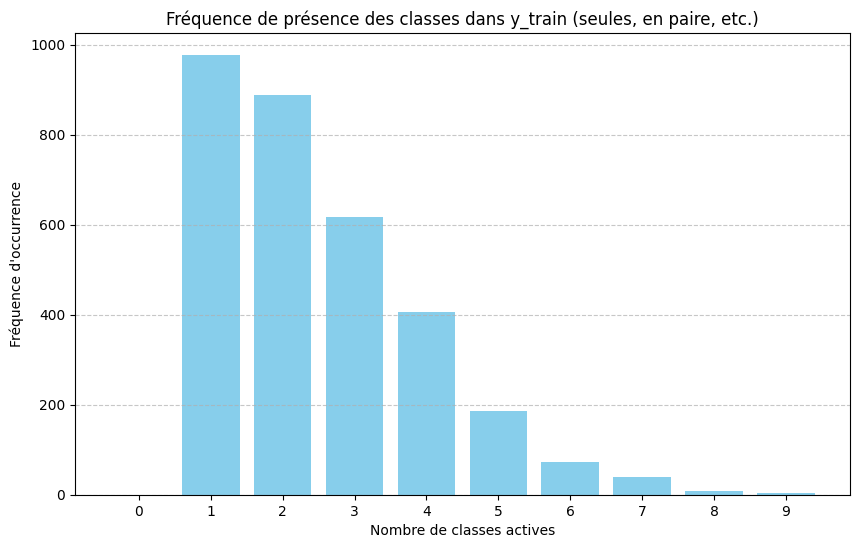

1 classes actives : 978 échantillons
2 classes actives : 888 échantillons
3 classes actives : 617 échantillons
4 classes actives : 407 échantillons
5 classes actives : 185 échantillons
6 classes actives : 73 échantillons
7 classes actives : 40 échantillons
8 classes actives : 8 échantillons
9 classes actives : 4 échantillons


In [10]:
plot_class_occurrences(y_resampled)

In [11]:
from sklearn.model_selection import train_test_split

X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(
    x_resampled, y_resampled, test_size=0.2, random_state=42
)

# Afficher les formes des nouveaux ensembles
print('Shape de X_train_stratified :', X_train_resampled.shape)
print('Shape de y_train_stratified :', y_train_resampled.shape)
print('Shape de X_test_stratified :', X_test_resampled.shape)
print('Shape de y_test_stratified :', y_test_resampled.shape)


Shape de X_train_stratified : (2560, 768)
Shape de y_train_stratified : (2560, 22)
Shape de X_test_stratified : (640, 768)
Shape de y_test_stratified : (640, 22)


[  51 1005  305  346  267  413  119  109  277  511  233  103  296   66
  220  178  283  321  459  111  248  396]


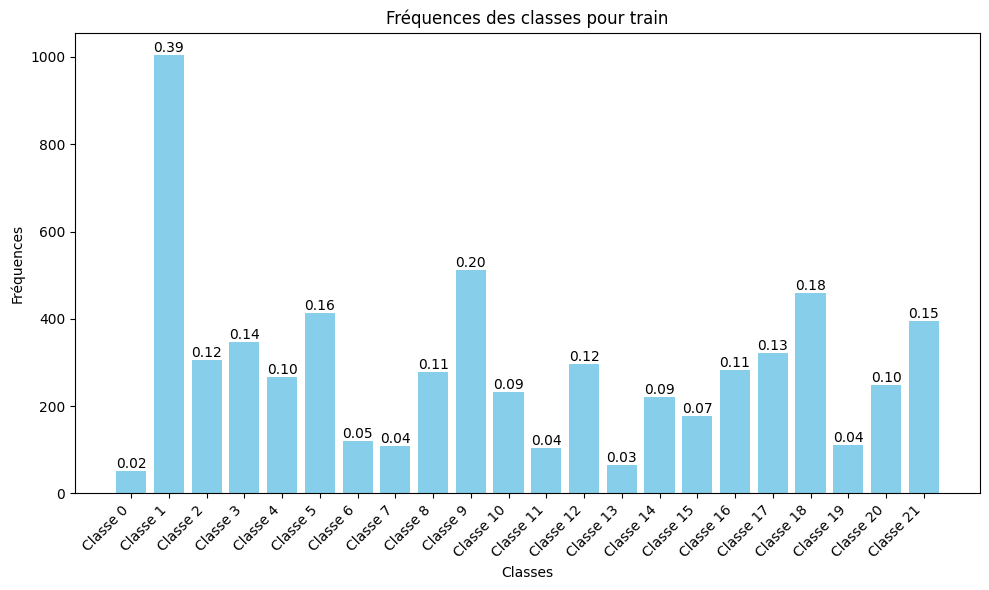

In [12]:
class_frequence(y_train_resampled, 'Fréquences des classes pour train')

[ 14 286  65  87  73 105  32  26  82 132  72  20  68  26  53  39  73  81
 132  24  59 110]


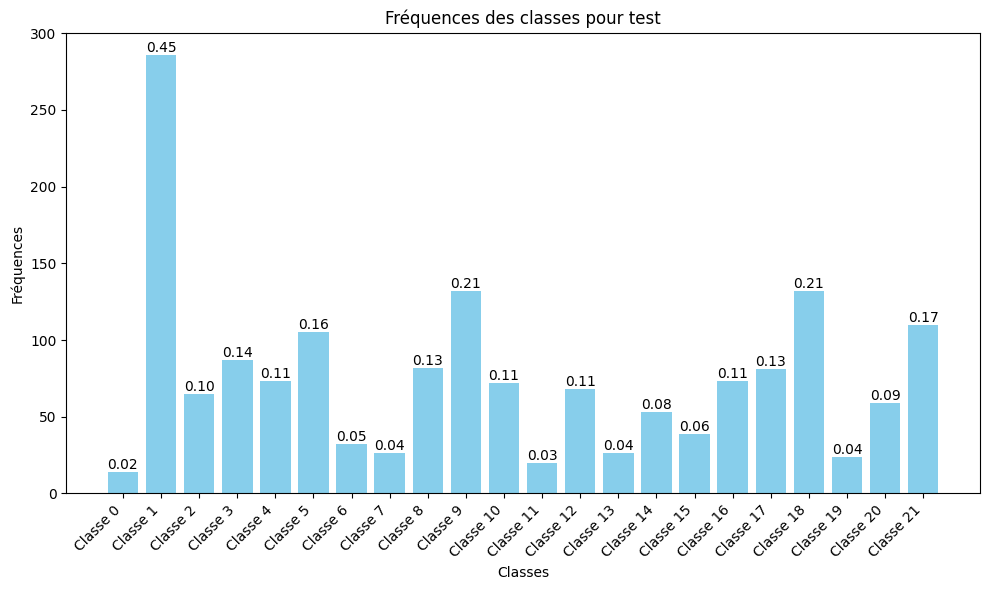

In [13]:
class_frequence(y_test_resampled, 'Fréquences des classes pour test')

In [14]:
from google.colab import files

np.save('X_train_resample.npy', X_train_resampled)
np.save('y_train_resample.npy', y_train_resampled)
np.save('X_test_resample.npy', X_test_resampled)
np.save('y_test_resample.npy', y_test_resampled)


files.download('X_train_resample.npy')
files.download('y_train_resample.npy')
files.download('X_test_resample.npy')
files.download('y_test_resample.npy')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>